In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import nbformat

In [16]:
lidar_data = pd.read_csv("../data/processed data/lidar_data_20.csv")
radar_data = pd.read_csv("../data/processed data/radar_data_20.csv")

In [17]:
lidar_data.head()

,"X, (m)","Y, (m)","Z, (m)","r, (reflectance)",lidar_ring
0,4.784132,5.774869,-0.016571,1.0,17.0
1,4.817103,5.660319,0.009310,4.0,17.0
2,4.842187,5.605693,0.019028,6.0,17.0
3,4.865714,5.562855,0.025539,7.0,17.0
4,4.884322,5.556008,0.022275,7.0,17.0


Text(0.5, 1.0, 'Visualization')

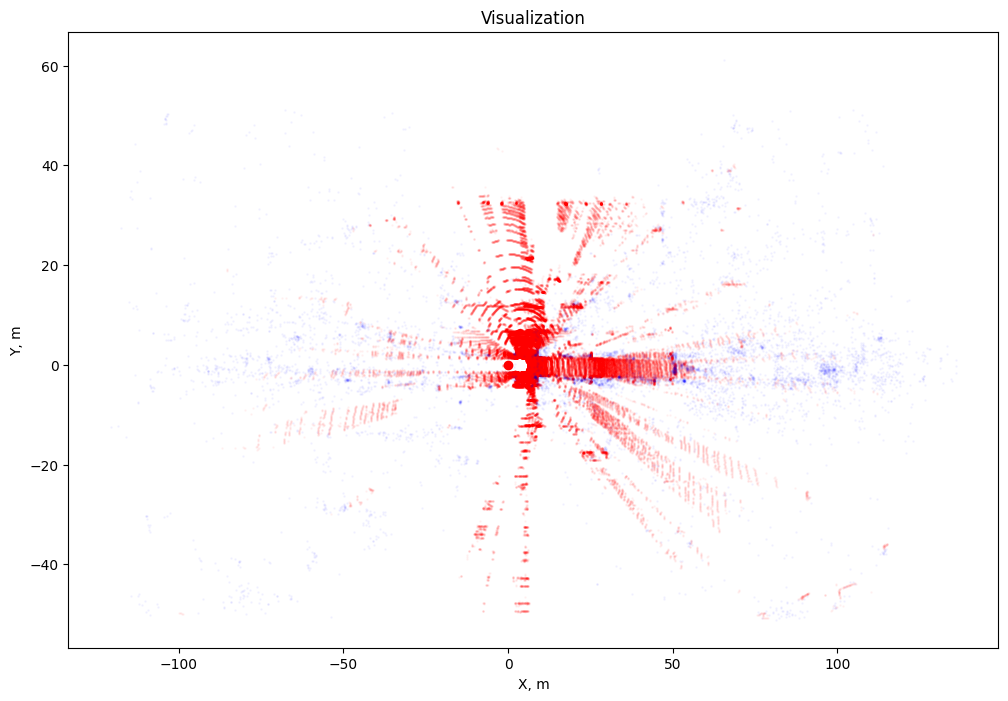

In [21]:
plt.figure(figsize=(12, 8))
plt.scatter(lidar_data["X, (m)"], lidar_data["Y, (m)"], s=1, alpha=0.03, c="red")
plt.scatter(radar_data["X, (m)"], radar_data["Y, (m)"], s=1, alpha=0.03, c="blue")
plt.scatter(0, 0, c="red")
plt.xlabel('X, m')
plt.ylabel('Y, m')
plt.title('Visualization')

90689


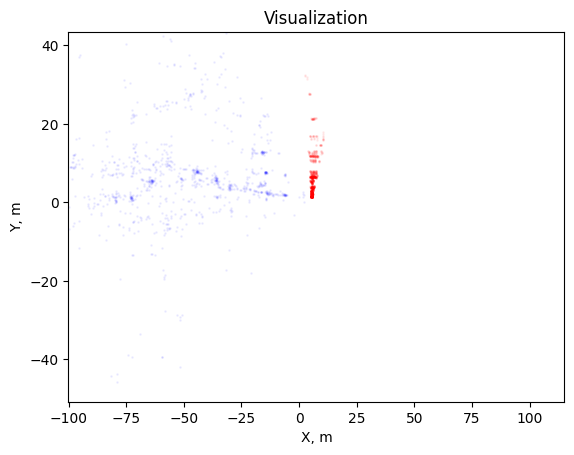

In [22]:
import matplotlib.animation as animation

print(len(lidar_data["X, (m)"]))
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=1, alpha=0.05, c="red")
scat2 = ax.scatter([], [], s=1, alpha=0.05, c="blue")
plt.xlabel('X, m')
plt.ylabel('Y, m')
plt.title('Visualization')
ax.set_xlim(
    min(lidar_data["X, (m)"].min(), lidar_data["X, (m)"].min()),
    max(lidar_data["X, (m)"].max(), lidar_data["X, (m)"].max()),
)
ax.set_ylim(
    min(lidar_data["Y, (m)"].min(), lidar_data["Y, (m)"].min()),
    max(lidar_data["Y, (m)"].max(), lidar_data["Y, (m)"].max()),
)


def animate(i):
    start_index = i * 1000
    end_index = (i + 1) * 1000
    if end_index > len(lidar_data):  # Проверка на выход за пределы данных
        end_index = len(lidar_data)

    scat.set_offsets(
        lidar_data[["X, (m)", "Y, (m)"]].iloc[start_index:end_index].values
    )
    scat2.set_offsets(
        radar_data[["X, (m)", "Y, (m)"]].iloc[start_index:end_index].values
    )

    return (scat, scat2)


ani = animation.FuncAnimation(
    fig, animate, repeat=True, frames=len(lidar_data["X, (m)"]) // 1000, interval=50
)

writer = animation.PillowWriter(fps=15, metadata=dict(artist="Me"), bitrate=1800)
ani.save("../data/scatter.gif", writer=writer)